# SVC_UTK_Model for AgeRange detection

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

### Data preprocessing

In [2]:
df = pd.read_csv('./dataset/UTK_dataset.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [4]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [5]:
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [6]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


### Data analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

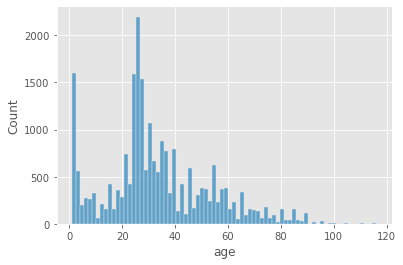

In [7]:
sns.histplot(data=df, x='age')

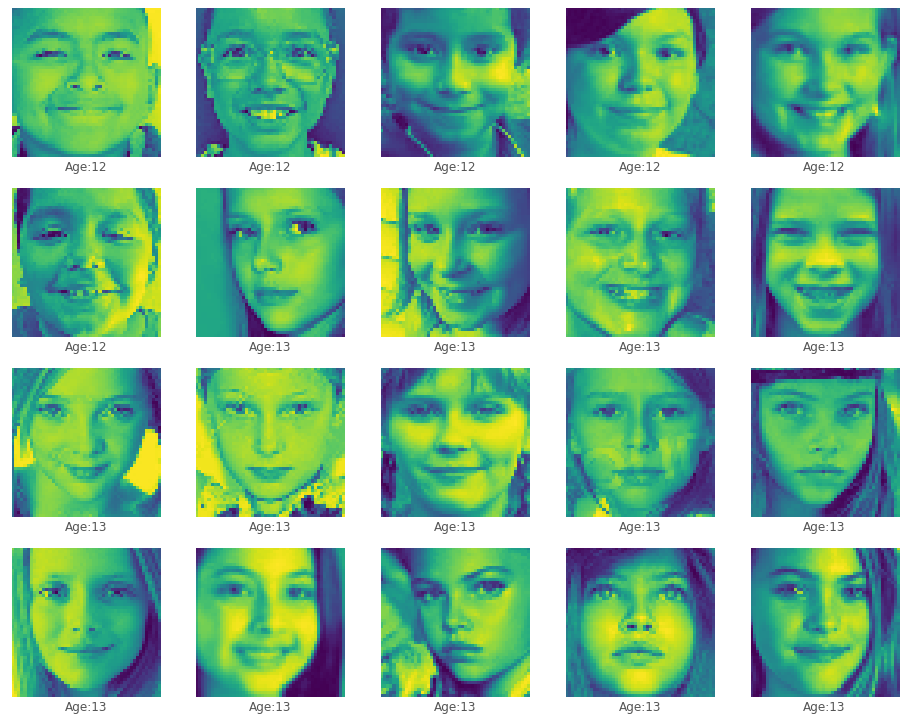

In [8]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i]))
plt.show()

In [9]:
# testing on a small subset of data right now 
test = df.sample(frac=0.3)
test

,age,ethnicity,gender,img_name,pixels
18774,52,1,0,20170117175021585.jpg.chip.jpg,"[225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225..."
18312,50,3,0,20170119203909752.jpg.chip.jpg,"[128.0, 75.0, 56.0, 72.0, 58.0, 52.0, 117.0, 1..."
14708,37,2,0,20170105163305795.jpg.chip.jpg,"[31.0, 12.0, 19.0, 21.0, 16.0, 14.0, 34.0, 95...."
3409,20,0,1,20170113005610158.jpg.chip.jpg,"[46.0, 46.0, 69.0, 117.0, 101.0, 86.0, 102.0, ..."
7227,26,1,0,20170114033015053.jpg.chip.jpg,"[255.0, 253.0, 254.0, 254.0, 254.0, 252.0, 248..."
...,...,...,...,...,...
2706,2,3,0,20161219225554448.jpg.chip.jpg,"[149.0, 182.0, 195.0, 204.0, 210.0, 215.0, 212..."
15288,39,3,0,20170117184958153.jpg.chip.jpg,"[236.0, 238.0, 236.0, 143.0, 43.0, 37.0, 38.0,..."
11540,31,4,1,20170103230330201.jpg.chip.jpg,"[21.0, 25.0, 13.0, 1.0, 1.0, 8.0, 19.0, 20.0, ..."
1633,14,2,1,20170103200931103.jpg.chip.jpg,"[9.0, 9.0, 12.0, 10.0, 15.0, 18.0, 37.0, 37.0,..."


In [10]:
X = np.array(test['pixels'].tolist())
y = test['age'] // 5

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model training - SVC

In [27]:
clf_poly = svm.SVC(kernel='poly')
clf_rbf = svm.SVC(kernel='rbf')
clf_sigmoid = svm.SVC(kernel='sigmoid')

In [15]:
clf_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [16]:
clf_rbf.fit(X_train, y_train)

SVC()

In [28]:
clf_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

### Model prediction

In [17]:
y_pred_poly = clf_poly.predict(X_test)

<AxesSubplot:>

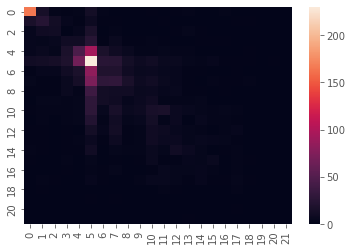

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test, y_pred_poly))

In [23]:
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       204
           1       0.27      0.34      0.30        68
           2       0.18      0.20      0.19        51
           3       0.12      0.14      0.13        71
           4       0.26      0.21      0.23       213
           5       0.33      0.51      0.40       452
           6       0.15      0.10      0.12       190
           7       0.18      0.14      0.16       204
           8       0.14      0.10      0.11       104
           9       0.12      0.08      0.09        88
          10       0.14      0.12      0.13       124
          11       0.03      0.03      0.03        79
          12       0.07      0.08      0.07        66
          13       0.07      0.05      0.06        63
          14       0.08      0.06      0.07        54
          15       0.25      0.19      0.21        32
          16       0.00      0.00      0.00        27
          17       0.12    

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
y_pred_sigmoid = clf_sigmoid.predict(X_test)

<AxesSubplot:>

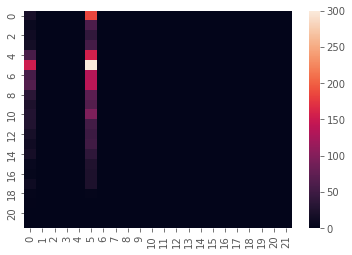

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test, y_pred_sigmoid))

In [31]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.03      0.09      0.05       204
           1       0.00      0.00      0.00        68
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        71
           4       0.00      0.00      0.00       213
           5       0.19      0.66      0.30       452
           6       0.00      0.00      0.00       190
           7       0.00      0.00      0.00       204
           8       0.00      0.00      0.00       104
           9       0.00      0.00      0.00        88
          10       0.00      0.00      0.00       124
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        63
          14       0.00      0.00      0.00        54
          15       0.00      0.00      0.00        32
          16       0.00      0.00      0.00        27
          17       0.00    

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
y_pred_rbf = clf_rbf.predict(X_test)

<AxesSubplot:>

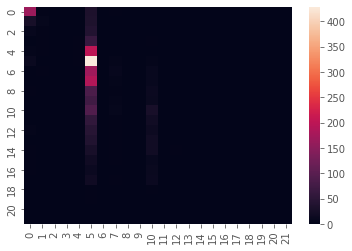

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test, y_pred_rbf))

In [24]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       204
           1       0.29      0.09      0.13        68
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        71
           4       0.27      0.01      0.03       213
           5       0.26      0.95      0.41       452
           6       0.00      0.00      0.00       190
           7       0.08      0.02      0.03       204
           8       0.00      0.00      0.00       104
           9       0.00      0.00      0.00        88
          10       0.15      0.23      0.18       124
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        63
          14       0.00      0.00      0.00        54
          15       0.00      0.00      0.00        32
          16       0.00      0.00      0.00        27
          17       0.00    

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Predicted vs Original')

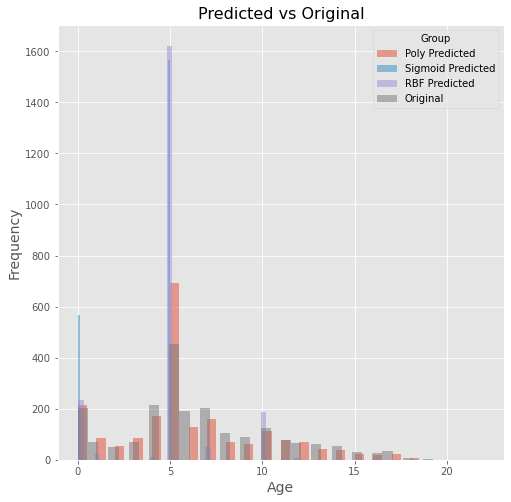

In [35]:
plt.figure(figsize=(8,8))

pd.Series(y_pred_poly).plot(kind='hist', bins=40, label='Poly Predicted', alpha=0.5)
pd.Series(y_pred_sigmoid).plot(kind='hist', bins=40, label='Sigmoid Predicted', alpha=0.5)
pd.Series(y_pred_rbf).plot(kind='hist', bins=40, label='RBF Predicted', alpha=0.5)
y_test.plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)